In [1]:
pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 42.3 MB/s eta 0:00:00


In [2]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from scipy import stats
from math import sqrt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from dmba import liftChart, gainsChart
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import dmba
from dmba import regressionSummary
%matplotlib inline
from xgboost import XGBRegressor
import keras
from keras.models import Sequential
from keras.layers import Dense

no display found. Using non-interactive Agg backend


In [3]:
from google.colab import files
file = files.upload()

Saving MiningProcess_Flotation_Plant_Database.csv to MiningProcess_Flotation_Plant_Database.csv


In [4]:
# Reading the dataset
df_mining = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")
df_mining

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


## Data Collection and Processing

In [5]:
# Printing all column names
print(df_mining.columns)

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')


In [6]:
# Information about the DataFrame. 
df_mining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [7]:
# Formating the date format
# For getting day, month and year 
# Dropping date column
df_mining['date'] = pd.to_datetime(df_mining['date'])
df_mining['Day'] = df_mining['date'].dt.day
df_mining['Month'] = df_mining['date'].dt.month
df_mining['Year'] = df_mining['date'].dt.year
df_mining.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Day,Month,Year
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"424,954","443,558","502,255","446,37","523,344","66,91","1,31",10,3,2017
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"432,939","448,086","496,363","445,922","498,075","66,91","1,31",10,3,2017
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"434,61","449,688","484,411","447,826","458,567","66,91","1,31",10,3,2017
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"442,865","446,21","471,411","437,69","427,669","66,91","1,31",10,3,2017
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"450,523","453,67","462,598","443,682","425,679","66,91","1,31",10,3,2017


In [8]:
# Calculating unique values in years
df_mining['Year'].nunique()

1

In [9]:
# Dropping Year Column as only one unique value is present
df_mining = df_mining.drop('Year' , axis = 1)
df_mining.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Day,Month
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31",10,3
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31",10,3
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31",10,3
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31",10,3
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31",10,3


In [10]:
# Replacing "," by "." in the dataframe for all columns
for column in df_mining.columns:
    df_mining[column] = df_mining[column].replace(',','.', regex = True)
df_mining.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Day,Month
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31,10,3
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31,10,3
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31,10,3
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31,10,3
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31,10,3


In [11]:
# Converting all columns to float data type
df_mining.iloc[:,1:26] = df_mining.iloc[:,1:26].astype(float)
print(df_mining.dtypes)

date                            datetime64[ns]
% Iron Feed                            float64
% Silica Feed                          float64
Starch Flow                            float64
Amina Flow                             float64
Ore Pulp Flow                          float64
Ore Pulp pH                            float64
Ore Pulp Density                       float64
Flotation Column 01 Air Flow           float64
Flotation Column 02 Air Flow           float64
Flotation Column 03 Air Flow           float64
Flotation Column 04 Air Flow           float64
Flotation Column 05 Air Flow           float64
Flotation Column 06 Air Flow           float64
Flotation Column 07 Air Flow           float64
Flotation Column 01 Level              float64
Flotation Column 02 Level              float64
Flotation Column 03 Level              float64
Flotation Column 04 Level              float64
Flotation Column 05 Level              float64
Flotation Column 06 Level              float64
Flotation Col

<ipython-input-11-1f8684f35553>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_mining.iloc[:,1:26] = df_mining.iloc[:,1:26].astype(float)


In [12]:
# Creating function for data features
def info(data):
    print("Size of dataset: ", data.size)
    print("Shape of dataset: ", data.shape)
    
# Calling the function  
info(df_mining)

Size of dataset:  19173778
Shape of dataset:  (737453, 26)


In [13]:
# Generating Descriptive Statistics
df_mining.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Day,Month
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763,15.330780,6.016869
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554,8.931482,1.651002
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000,1.000000,3.000000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000,8.000000,5.000000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000,15.000000,6.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000,23.000000,7.000000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000,31.000000,9.000000


In [14]:
# Counting percentage of null/missing values for each variable
missing_per = df_mining.isnull().sum() * 100 / len(df_mining)
missing_per = pd.DataFrame({'Column_Names': df_mining.columns,'Total_Number_of_Nulls': df_mining.isna().sum(),'Missing_Percent': missing_per})
missing_per.sort_values('Missing_Percent', ascending = False, inplace = True)
missing_per.reset_index(drop = True, inplace = True)
missing_per

,Column_Names,Total_Number_of_Nulls,Missing_Percent
0,date,0,0.0
1,% Iron Feed,0,0.0
2,Day,0,0.0
3,% Silica Concentrate,0,0.0
4,% Iron Concentrate,0,0.0
5,Flotation Column 07 Level,0,0.0
6,Flotation Column 06 Level,0,0.0
7,Flotation Column 05 Level,0,0.0
8,Flotation Column 04 Level,0,0.0
9,Flotation Column 03 Level,0,0.0


In [15]:
# Dropping Duplicates from the dataset
print('Size and shape of dataset before dropping duplicates')
info(df_mining)
df_mining = df_mining.drop_duplicates()
print('\nSize and shape of dataset after dropping duplicates')
info(df_mining)

Size and shape of dataset before dropping duplicates
Size of dataset:  19173778
Shape of dataset:  (737453, 26)

Size and shape of dataset after dropping duplicates
Size of dataset:  19143332
Shape of dataset:  (736282, 26)


<ipython-input-16-7d5b24e8a7bf>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_mining.corr(), annot=True, cmap="RdYlGn")


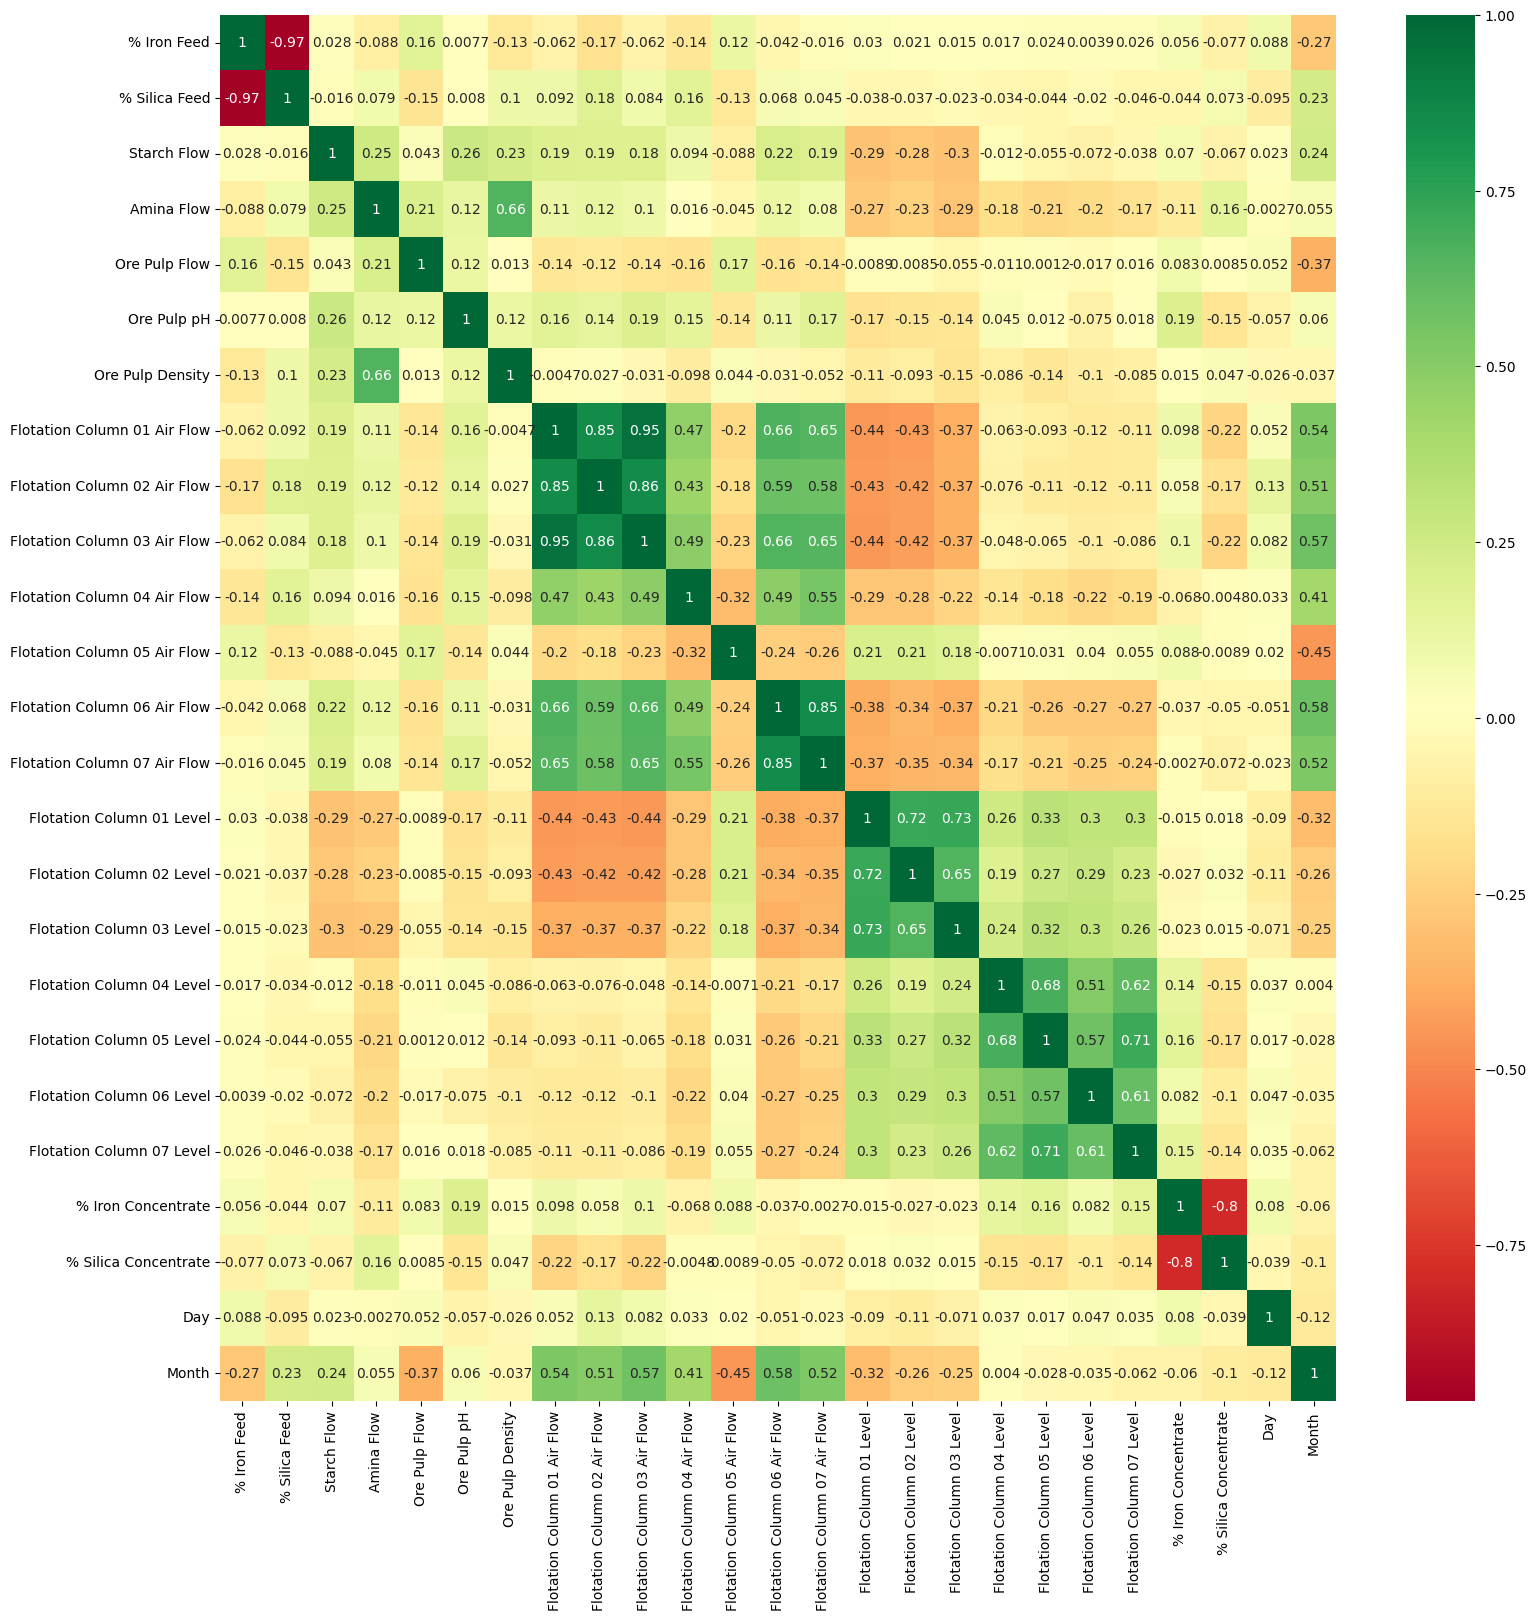

In [16]:
# Correlation Matrix 
plt.style.use('default')
plt.figure(figsize=(18,18))
sns.heatmap(df_mining.corr(), annot=True, cmap="RdYlGn")
plt.show()

## Data Exploration and Visualization


In [17]:
# Setting date as index
df_mining = df_mining.set_index('date')

In [18]:
# Dropping Columns having correlation more than 0.7 & dropping '% Silica Feed' column as it has strong negave correlation with the other variable
df_mining = df_mining.drop(['% Silica Feed','Flotation Column 02 Air Flow','Flotation Column 03 Air Flow',
                            'Flotation Column 07 Air Flow','Flotation Column 02 Level',
                            'Flotation Column 03 Level','Flotation Column 05 Level','Flotation Column 07 Level'],axis = 1)
df_mining

,% Iron Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 01 Level,Flotation Column 04 Level,Flotation Column 06 Level,% Iron Concentrate,% Silica Concentrate,Day,Month
date,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,3019.53,557.434,395.713,10.06640,1.74000,249.214,295.096,306.400,250.225,457.396,443.558,446.370,66.91,1.31,10.0,3.0
2017-03-10 01:00:00,55.20,3024.41,563.965,397.383,10.06720,1.74000,249.719,295.096,306.400,250.137,451.891,448.086,445.922,66.91,1.31,10.0,3.0
2017-03-10 01:00:00,55.20,3043.46,568.054,399.668,10.06800,1.74000,249.741,295.096,306.400,251.345,451.240,449.688,447.826,66.91,1.31,10.0,3.0
2017-03-10 01:00:00,55.20,3047.36,568.665,397.939,10.06890,1.74000,249.917,295.096,306.400,250.422,452.441,446.210,437.690,66.91,1.31,10.0,3.0
2017-03-10 01:00:00,55.20,3033.69,558.167,400.254,10.06970,1.74000,250.203,295.096,306.400,249.983,452.441,453.670,443.682,66.91,1.31,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,49.75,2710.94,441.052,386.570,9.62129,1.65365,302.344,299.920,299.623,346.794,392.160,418.725,446.357,64.27,1.71,9.0,9.0
2017-09-09 23:00:00,49.75,2692.01,473.436,384.939,9.62063,1.65352,303.013,299.710,300.465,330.023,401.505,418.377,372.995,64.27,1.71,9.0,9.0
2017-09-09 23:00:00,49.75,2692.20,500.488,383.496,9.61874,1.65338,303.662,299.927,299.707,329.590,408.899,419.531,336.035,64.27,1.71,9.0,9.0


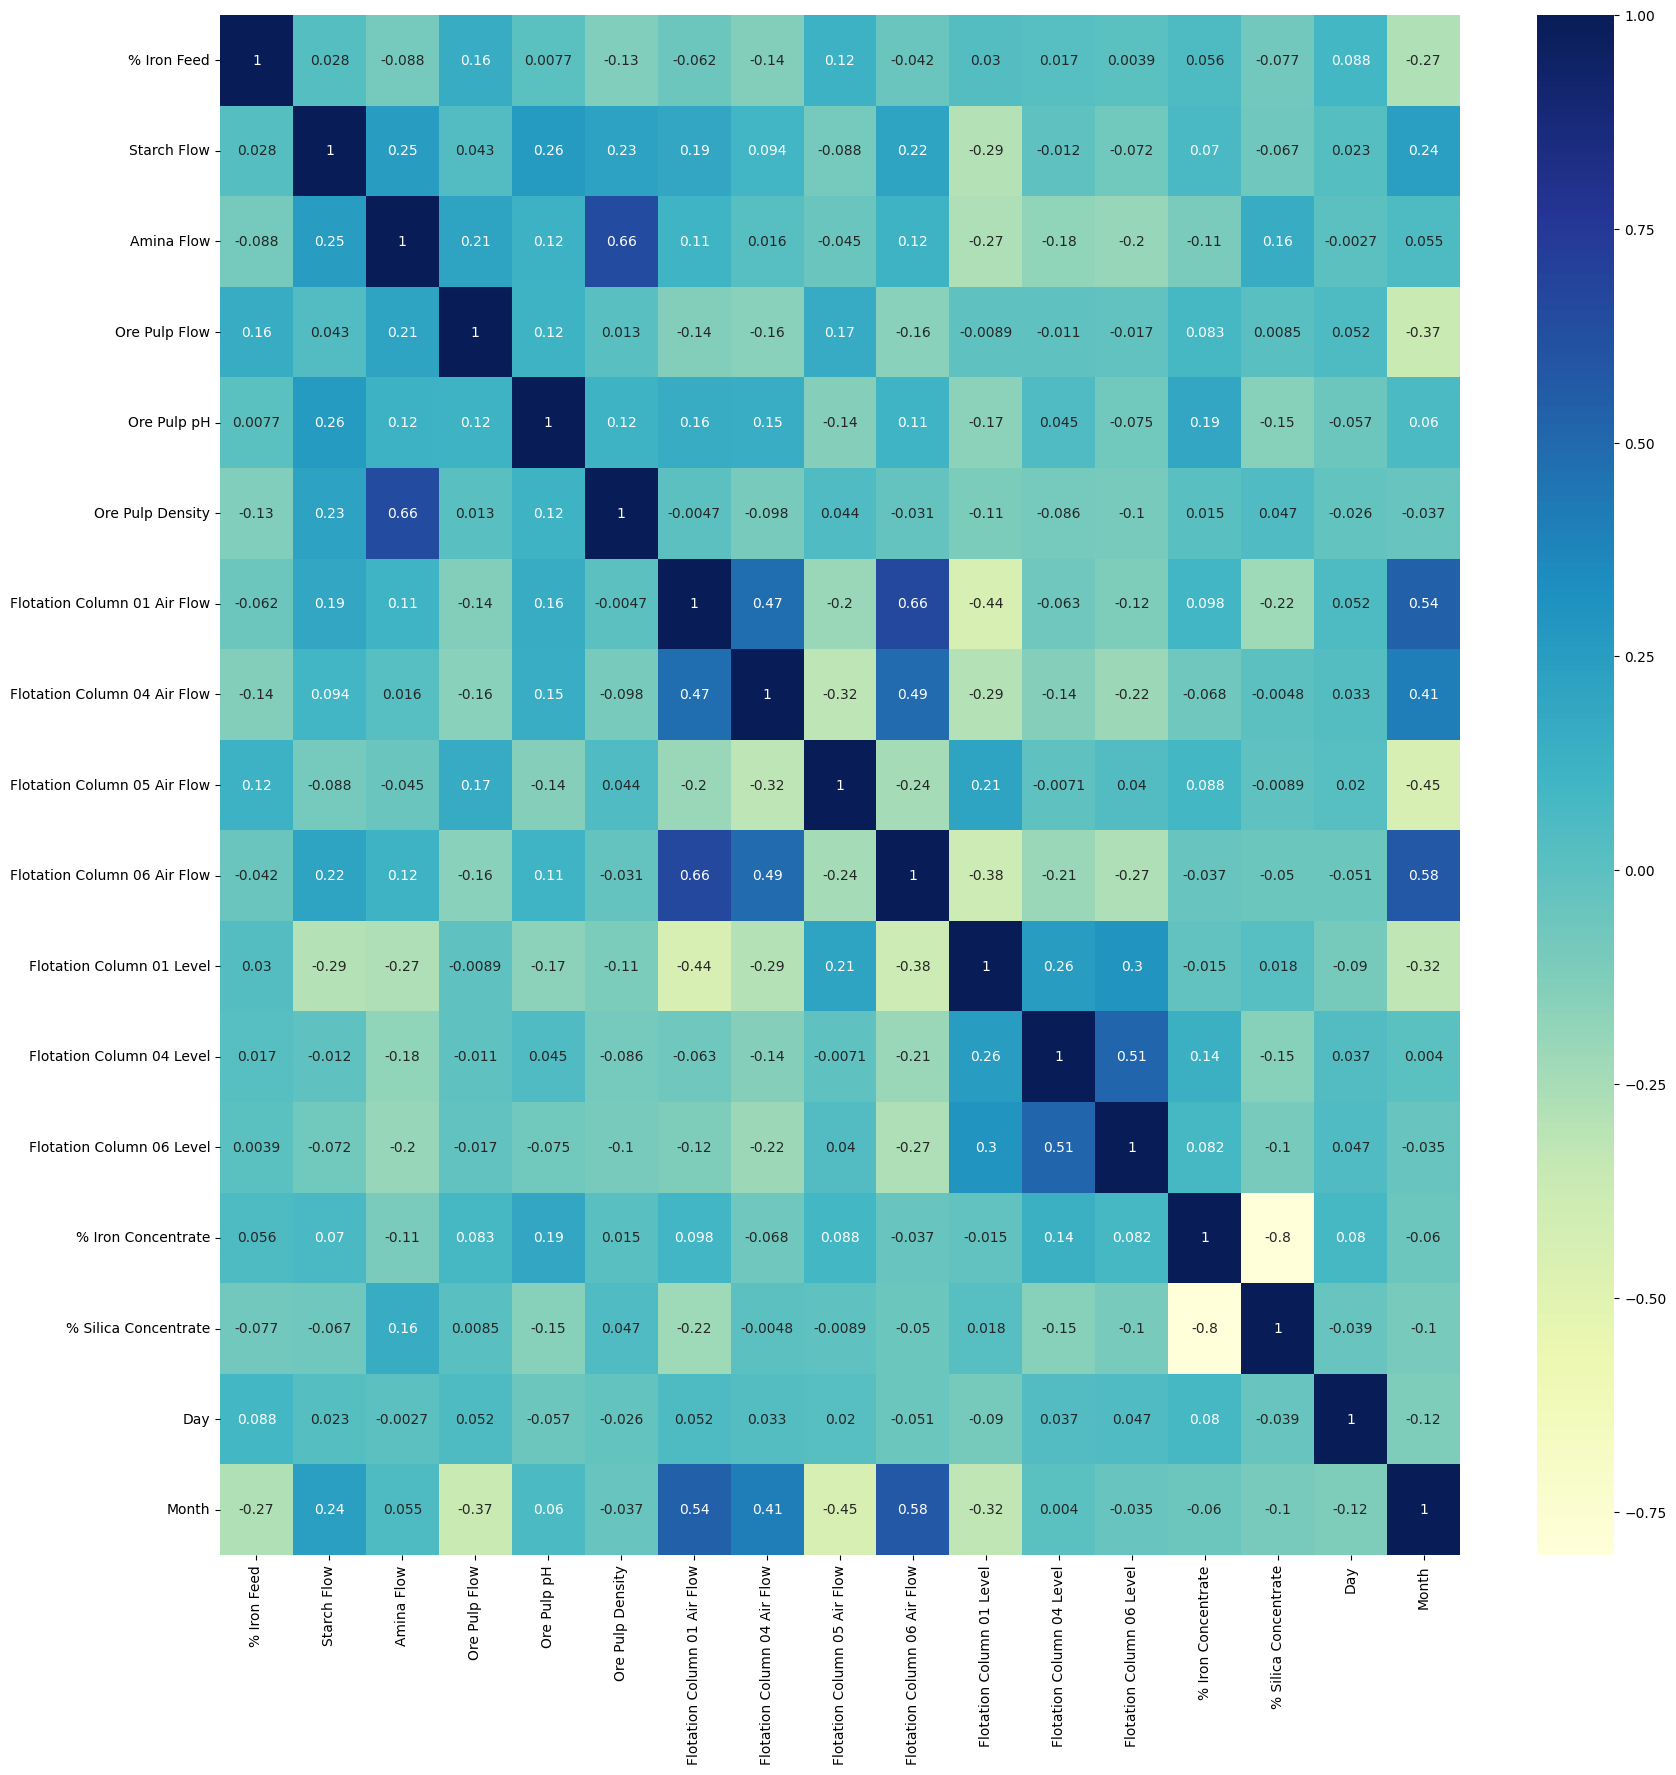

In [19]:
# Correlation Matrix after dropping highly correlated columns
plt.style.use('default')
plt.figure(figsize=(20,20))
sns.heatmap(df_mining.corr(), annot=True, cmap="YlGnBu")
plt.show()

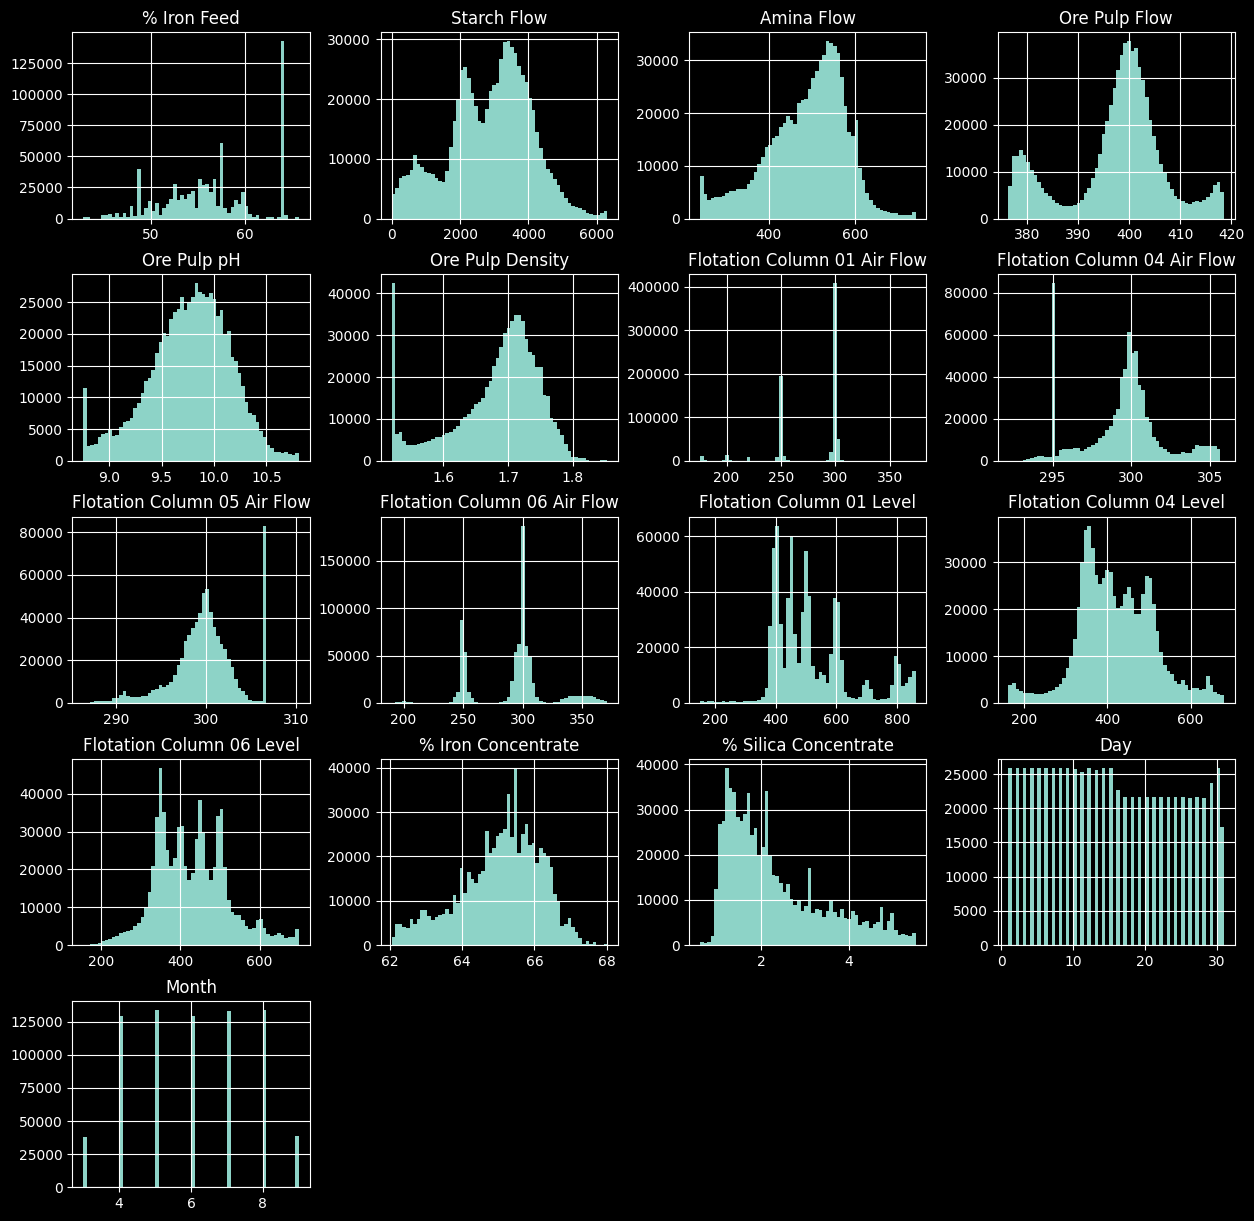

Text(0.5, 0.98, 'figure title')

<Figure size 640x480 with 0 Axes>

In [20]:
# Histogram to check for outliers
plt.style.use(['dark_background'])
df_mining.hist(bins = 60, figsize = (15,15))
plt.show()
plt.suptitle('figure title', color='w')

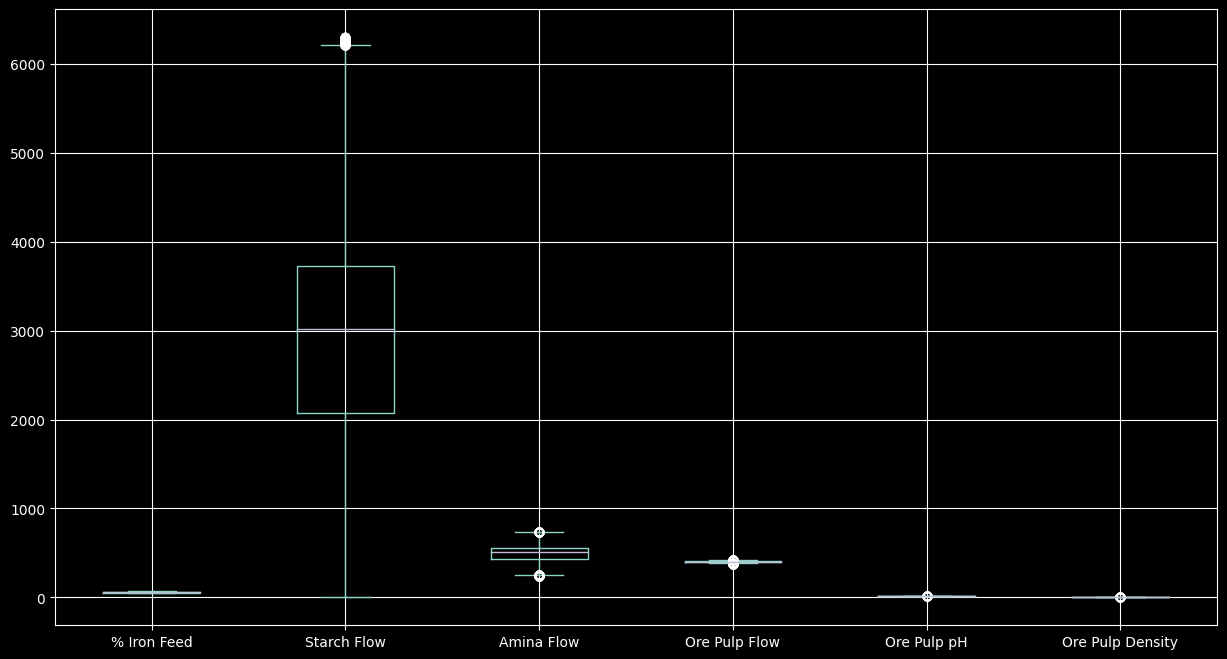

In [21]:
# Box plots to check further outliers
df_mining[['% Iron Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density' ]].plot.box(figsize = (15,8), grid = True);

<Axes: >

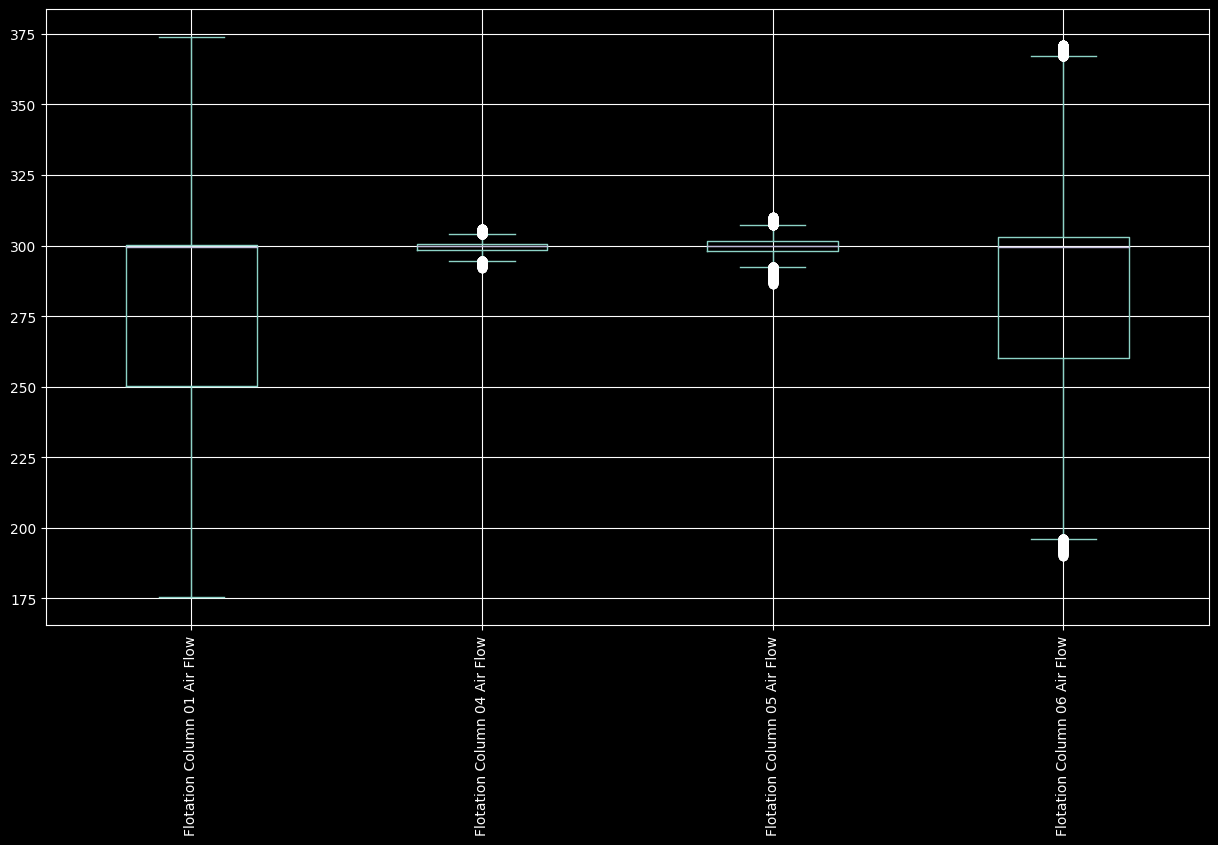

In [22]:
# Box plots to check further outliers
df_mining[['Flotation Column 01 Air Flow' , 'Flotation Column 04 Air Flow' , 
           'Flotation Column 05 Air Flow' , 'Flotation Column 06 Air Flow' ]].plot.box(figsize = (15,8), grid = True, rot = 90)

<Axes: >

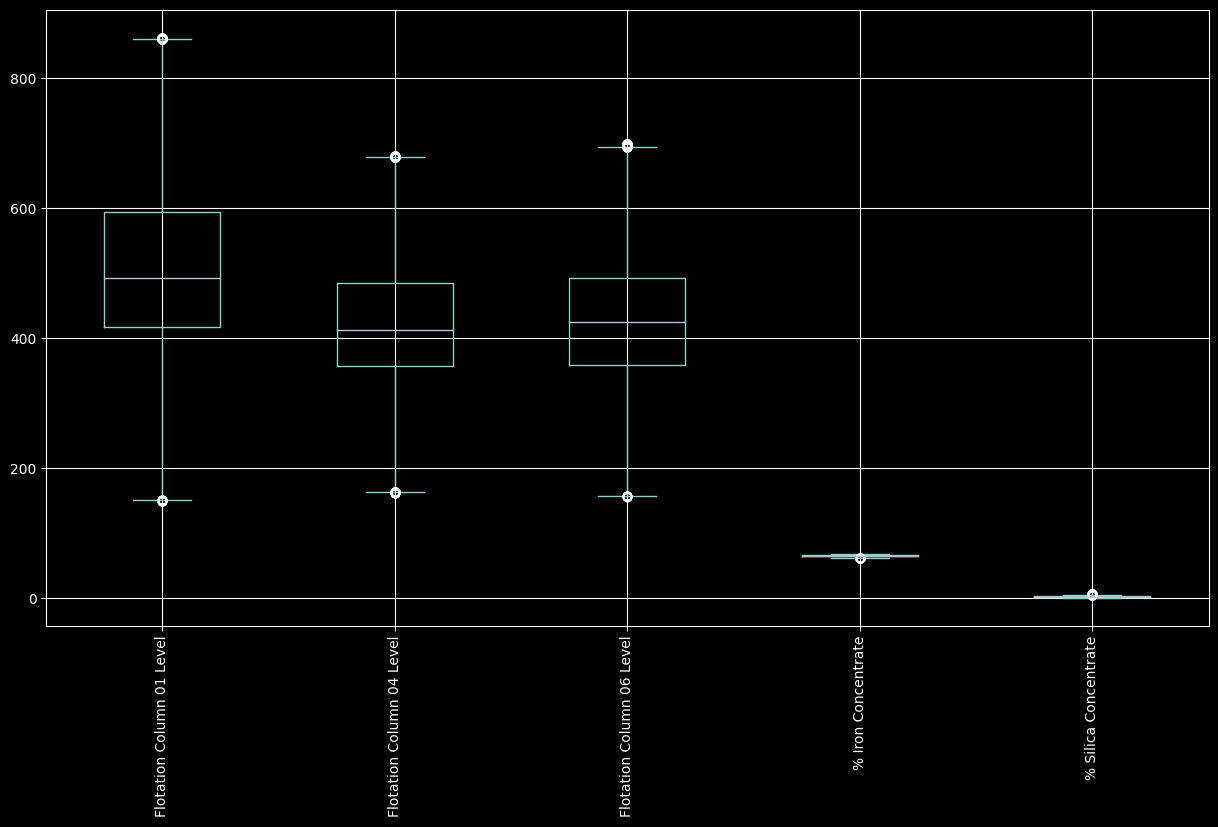

In [23]:
# Box plots to check further outliers
df_mining[['Flotation Column 01 Level' , 'Flotation Column 04 Level' , 'Flotation Column 06 Level', '% Iron Concentrate' , '% Silica Concentrate' ]].plot.box(figsize = (15,8), grid = True, rot = 90)

In [24]:
# Removing Outliers using z-score method
df_mining = df_mining[(np.abs(stats.zscore(df_mining)) < 2).all(axis=1)]

For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
All(axis=1) ensures that for each row, all column satisfy the constraint.
Finally, result of this condition is used to index the dataframe.

In [25]:
df_mining.info()
info(df_mining)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 395688 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   395688 non-null  float64
 1   Starch Flow                   395688 non-null  float64
 2   Amina Flow                    395688 non-null  float64
 3   Ore Pulp Flow                 395688 non-null  float64
 4   Ore Pulp pH                   395688 non-null  float64
 5   Ore Pulp Density              395688 non-null  float64
 6   Flotation Column 01 Air Flow  395688 non-null  float64
 7   Flotation Column 04 Air Flow  395688 non-null  float64
 8   Flotation Column 05 Air Flow  395688 non-null  float64
 9   Flotation Column 06 Air Flow  395688 non-null  float64
 10  Flotation Column 01 Level     395688 non-null  float64
 11  Flotation Column 04 Level     395688 non-null  float64
 12  Flotation 

array([[<Axes: title={'center': 'Starch Flow'}>,
        <Axes: title={'center': 'Amina Flow'}>],
       [<Axes: title={'center': 'Ore Pulp Flow'}>,
        <Axes: title={'center': 'Ore Pulp pH'}>],
       [<Axes: title={'center': 'Ore Pulp Density'}>, <Axes: >]],
      dtype=object)

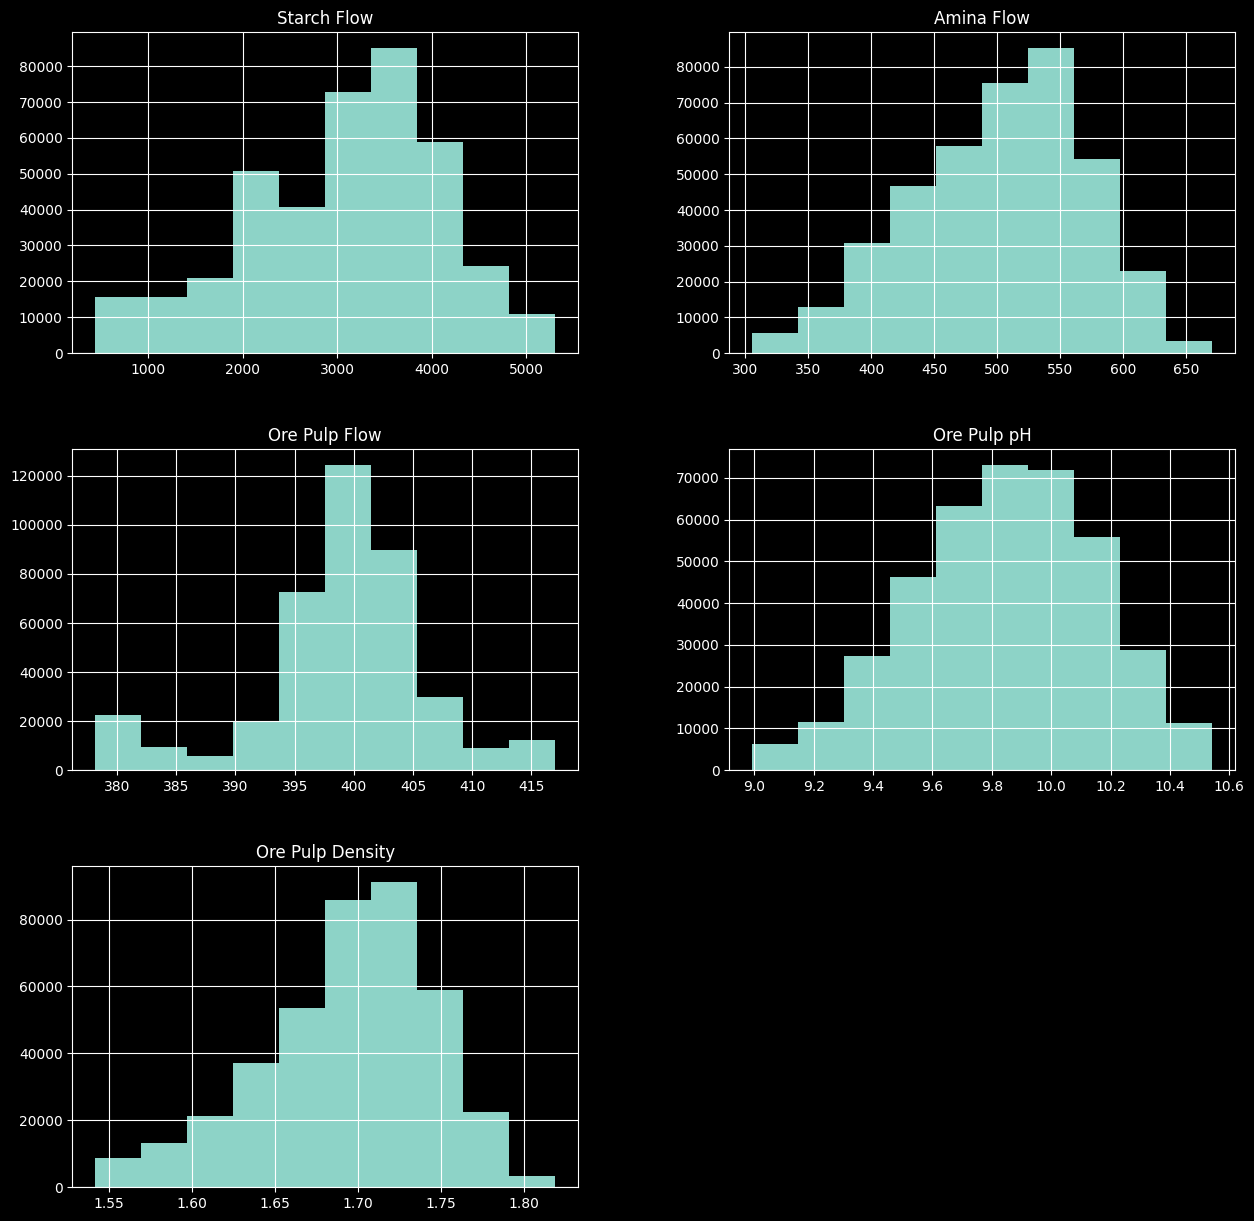

In [26]:
# Histogram for 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density'
df_mining.hist(column=['Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density'],grid=True,figsize=(15,15))

array([[<Axes: title={'center': 'Flotation Column 01 Air Flow'}>,
        <Axes: title={'center': 'Flotation Column 04 Air Flow'}>,
        <Axes: title={'center': 'Flotation Column 05 Air Flow'}>],
       [<Axes: title={'center': 'Flotation Column 06 Air Flow'}>,
        <Axes: title={'center': 'Flotation Column 01 Level'}>,
        <Axes: title={'center': 'Flotation Column 04 Level'}>],
       [<Axes: title={'center': 'Flotation Column 06 Level'}>, <Axes: >,
        <Axes: >]], dtype=object)

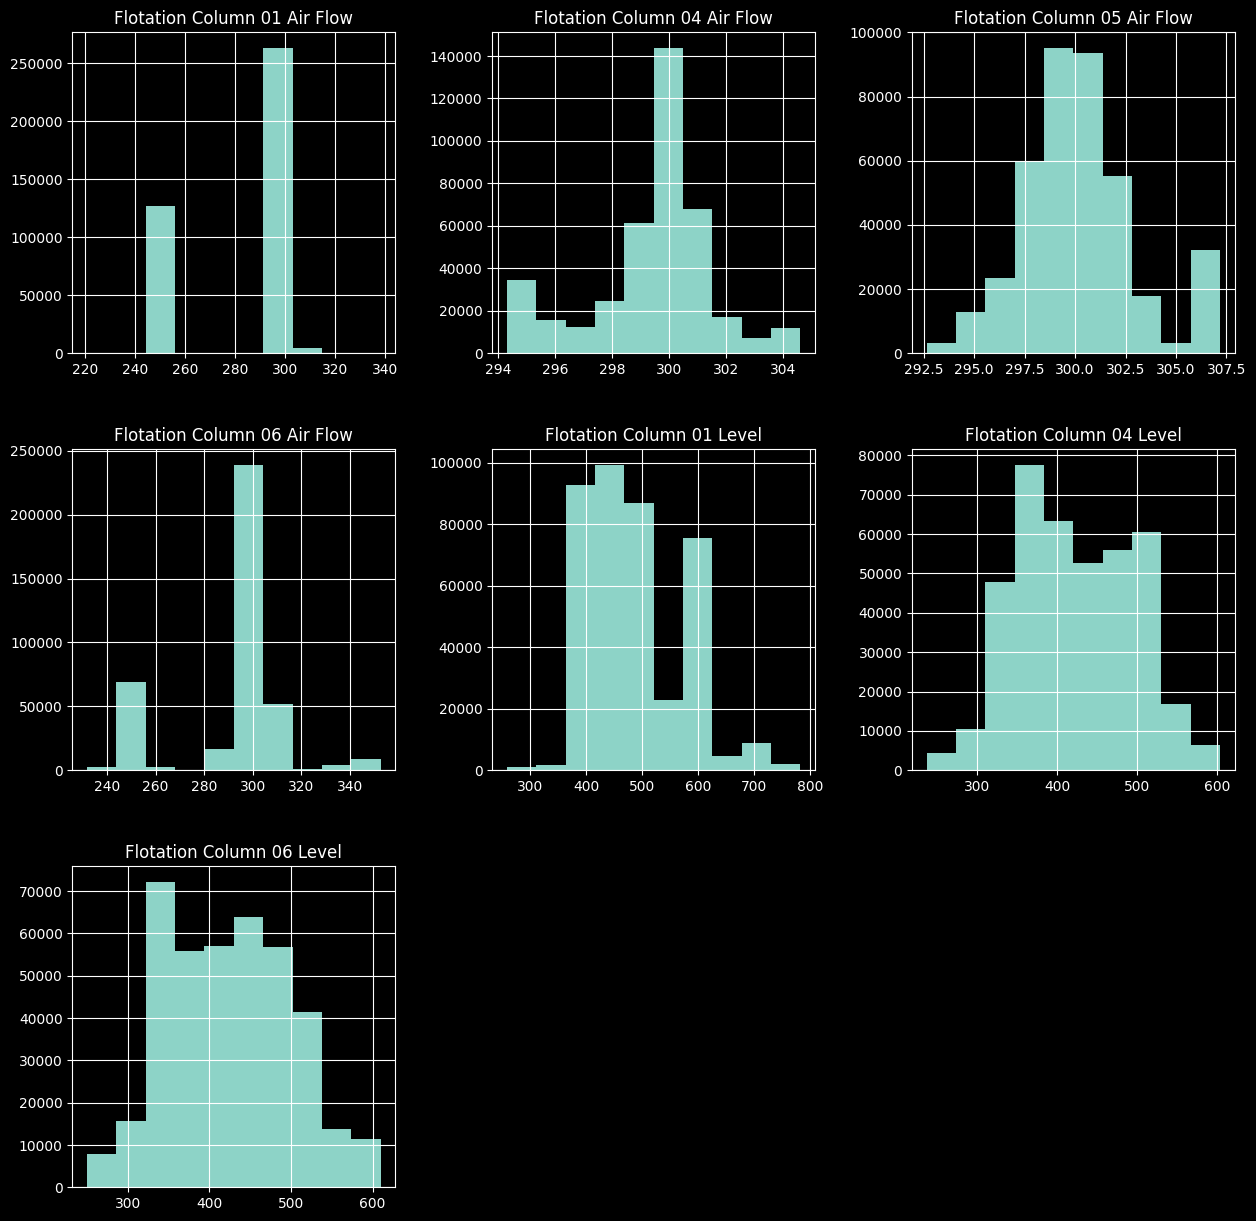

In [27]:
# Histograms
df_mining.hist(column=['Flotation Column 01 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 
                       'Flotation Column 06 Air Flow', 'Flotation Column 01 Level','Flotation Column 04 Level', 
                       'Flotation Column 06 Level'],grid=True,figsize=(15,15))

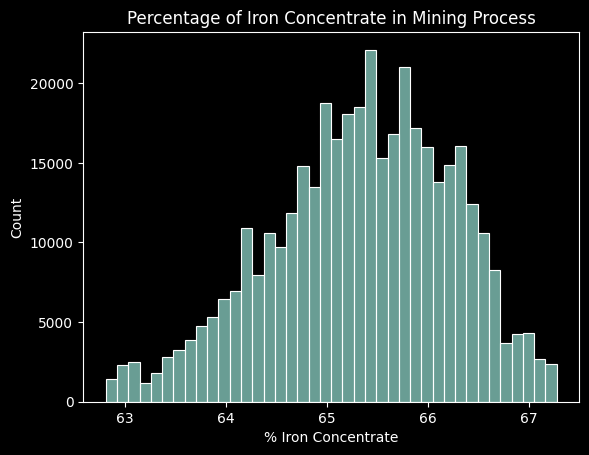

In [28]:
# Iron concentrate in mining process
sns.histplot(data=df_mining['% Iron Concentrate'], bins=40)
plt.title('Percentage of Iron Concentrate in Mining Process')
plt.show()

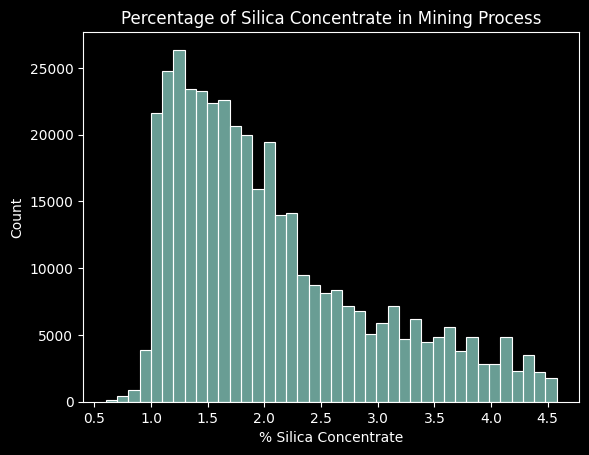

In [29]:
# Silica Concentrate in mining process
sns.histplot(data=df_mining['% Silica Concentrate'], bins=40)
plt.title('Percentage of Silica Concentrate in Mining Process')
plt.show()

(<Axes: xlabel='Day', ylabel='% Iron Feed'>,
 <Axes: xlabel='Day', ylabel='% Iron Feed'>)

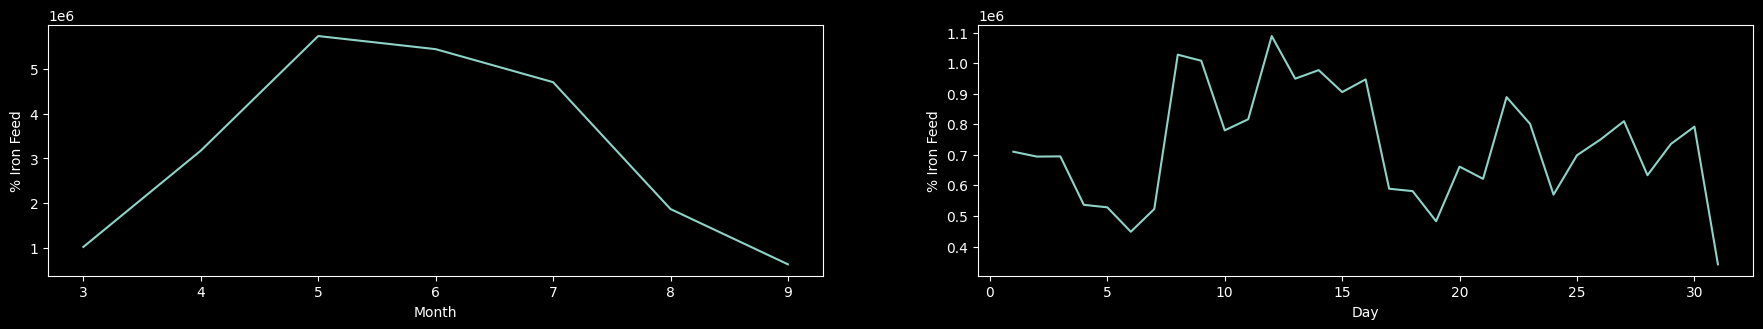

In [30]:
# Line plot for % iron feed and % Iron Feed over 3 - 9 months and Days
df1 = df_mining.groupby('Month')['% Iron Feed'].sum()
df2 = df_mining.groupby('Day')['% Iron Feed'].sum()
df1 = df1.reset_index()
df2 = df2.reset_index()
plt.figure(figsize=(22,15))
plt.subplot(421), sns.lineplot(data=df1, x='Month', y='% Iron Feed')
plt.subplot(422), sns.lineplot(data=df2, x='Day', y='% Iron Feed')

## Model Exploration, Selection and Implementation

In [31]:
# Copying dataset for further use
df = df_mining
df = df.reset_index()

In [32]:
# Split the dataset into training and test sets
X = df.drop(['date','% Iron Concentrate'], axis=1)  # Features
Y = df["% Iron Concentrate"]  # Target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)
# Printing the shape of the train and test data
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(237412, 16) (158276, 16) (237412,) (158276,)


In [33]:
# Using Standard Scalar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Linear Regression

In [34]:
# Train a linear regression model on the training set
LRM = LinearRegression()
LRM.fit(X_train, Y_train)

LinearRegression()

In [95]:
# Make predictions on the test set
Y_pred_1 = LRM.predict(X_test)

In [36]:
# Compariosn of Predicted and Actual values with Residual Calculations
result_1 = pd.DataFrame({'Predicted': Y_pred_1, 'Actual': Y_test, 'Residual': Y_test - Y_pred_1})
result_1

,Predicted,Actual,Residual
148061,66.121665,66.58,0.458335
395181,65.116038,64.65,-0.466038
70937,65.803241,65.57,-0.233241
156381,65.858678,66.31,0.451322
269131,65.448217,64.71,-0.738217
...,...,...,...
216358,64.933172,65.07,0.136828
61007,64.596939,65.20,0.603061
332831,65.277357,64.21,-1.067357
87520,65.696688,66.28,0.583312


In [37]:
# Calculate the R-squared score
r2 = r2_score(Y_test, Y_pred_1)
print("Accuracy of Linear Regression : ", r2*100)

Accuracy of Linear Regression :  58.79279633762097


<Axes: xlabel='% Iron Concentrate'>

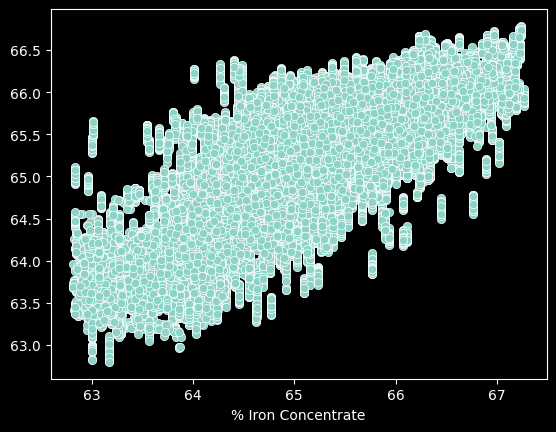

In [38]:
# Scatter Plot
sns.scatterplot(x=Y_test, y=Y_pred_1)

### K-Nearest Neighbors

In [39]:
# Create a KNN regressor object and fit it to the training data
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train, Y_train)

KNeighborsRegressor()

In [96]:
# Use the trained model to make predictions on the test data
Y_pred_2 = KNN.predict(X_test)

In [41]:
# Compariosn of Predicted and Actual values with Residual Calculations
result_2 = pd.DataFrame({'Predicted': Y_pred_2, 'Actual': Y_test, 'Residual': Y_test - Y_pred_2})
result_2

,Predicted,Actual,Residual
148061,66.498,66.58,0.082
395181,64.650,64.65,0.000
70937,65.570,65.57,0.000
156381,66.286,66.31,0.024
269131,64.710,64.71,0.000
...,...,...,...
216358,65.070,65.07,0.000
61007,65.200,65.20,0.000
332831,64.606,64.21,-0.396
87520,66.280,66.28,0.000


In [43]:
# Calculate the R-squared score
r2 = r2_score(Y_test, Y_pred_2)
print("Accuracy of K-Nearest Neighbors : ", r2*100)

Accuracy of K-Nearest Neighbors :  92.95835821782468


<Axes: xlabel='% Iron Concentrate'>

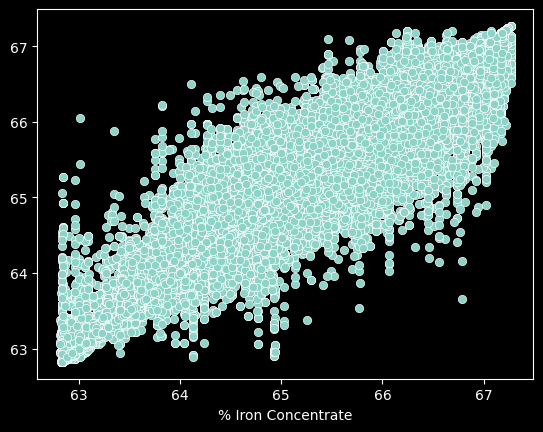

In [44]:
# Scatter Plot
sns.scatterplot(x=Y_test, y=Y_pred_2)

### Regression Tree

In [45]:
# Create a Decision Tree regressor object and fit it to the training data
DT = DecisionTreeRegressor(max_depth=5, random_state=42)
DT.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [97]:
# Use the trained model to make predictions on the test data
Y_pred_3 = DT.predict(X_test)

In [47]:
# Compariosn of Predicted and Actual values with Residual Calculations
result_3 = pd.DataFrame({'Predicted': Y_pred_3, 'Actual': Y_test, 'Residual': Y_test - Y_pred_3})
result_3

,Predicted,Actual,Residual
148061,65.867215,66.58,0.712785
395181,65.209340,64.65,-0.559340
70937,65.828280,65.57,-0.258280
156381,66.504232,66.31,-0.194232
269131,65.516289,64.71,-0.806289
...,...,...,...
216358,64.942542,65.07,0.127458
61007,64.540067,65.20,0.659933
332831,65.209340,64.21,-0.999340
87520,65.429626,66.28,0.850374


In [48]:
# Calculate the R-squared score
r2 = r2_score(Y_test, Y_pred_3)
print("Accuracy of Regression Tree : ", r2*100)

Accuracy of Regression Tree :  61.55131659334434


<Axes: xlabel='% Iron Concentrate'>

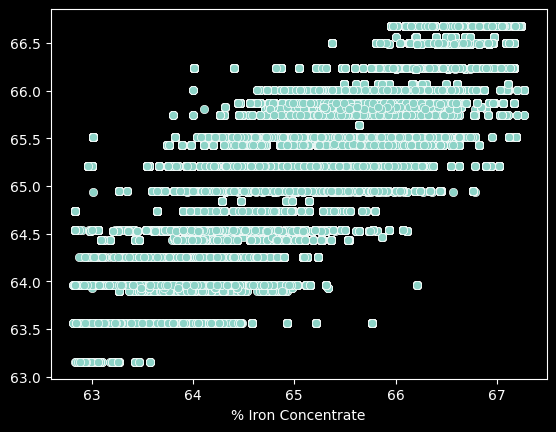

In [49]:
# Scatter Plot
sns.scatterplot(x=Y_test, y=Y_pred_3)

### Radom forest

In [50]:
# Create a Random Forest regressor object and fit it to the training data
RF = RandomForestRegressor(random_state = 0, n_estimators = 100)  
RF.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

In [98]:
# Use the trained model to make predictions on the test data
Y_pred_4 = RF.predict(X_test)

In [52]:
# Compariosn of Predicted and Actual values with Residual Calculations
result_4 = pd.DataFrame({'Predicted': Y_pred_4, 'Actual': Y_test, 'Residual': Y_test - Y_pred_4})
result_4

,Predicted,Actual,Residual
148061,66.5759,66.58,4.100000e-03
395181,64.6510,64.65,-1.000000e-03
70937,65.5738,65.57,-3.800000e-03
156381,66.3100,66.31,-1.278977e-13
269131,64.7100,64.71,-2.842171e-14
...,...,...,...
216358,65.0700,65.07,7.105427e-14
61007,65.2000,65.20,1.278977e-13
332831,64.2100,64.21,-2.842171e-14
87520,66.2800,66.28,4.263256e-14


In [53]:
# Calculate the R-squared score
r2 = r2_score(Y_test, Y_pred_4)
print("Accuracy of Regression Tree : ", r2*100)

Accuracy of Regression Tree :  97.5741044229181


<Axes: xlabel='% Iron Concentrate'>

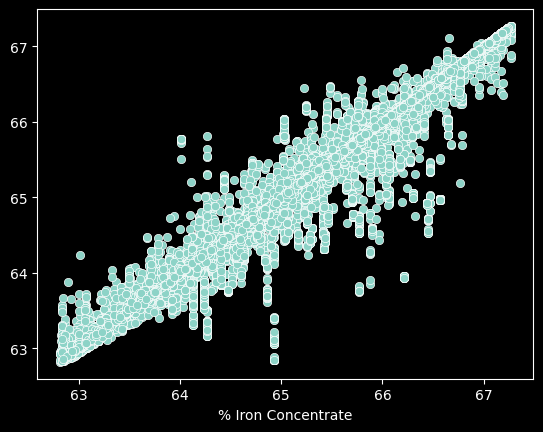

In [54]:
# Scatter Plot
sns.scatterplot(x=Y_test, y=Y_pred_4)

### Boosted Trees 

In [55]:
# Create a Boosted Tree nobject and fit it to the training data
XGB = XGBRegressor(n_estimators=1000)
XGB.fit(X_train, Y_train, early_stopping_rounds=5, eval_set=[(X_test, Y_test)], verbose=False)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [99]:
# Predicting the target values for the test data
Y_pred_5 = XGB.predict(X_test)

In [57]:
# Compariosn of Predicted and Actual values with Residual Calculations
result_5 = pd.DataFrame({'Predicted': Y_pred_5, 'Actual': Y_test, 'Residual': Y_test - Y_pred_5})
result_5

,Predicted,Actual,Residual
148061,66.302917,66.58,0.277083
395181,64.702621,64.65,-0.052621
70937,65.750870,65.57,-0.180870
156381,66.288551,66.31,0.021449
269131,64.615677,64.71,0.094323
...,...,...,...
216358,65.147331,65.07,-0.077331
61007,65.123260,65.20,0.076740
332831,64.552002,64.21,-0.342002
87520,66.184273,66.28,0.095727


In [58]:
# Calculate the R-squared score
r2 = r2_score(Y_test, Y_pred_5)
print("Accuracy of Bossted Trees : ", r2*100)

Accuracy of Bossted Trees :  95.8539446462801


<Axes: xlabel='% Iron Concentrate'>

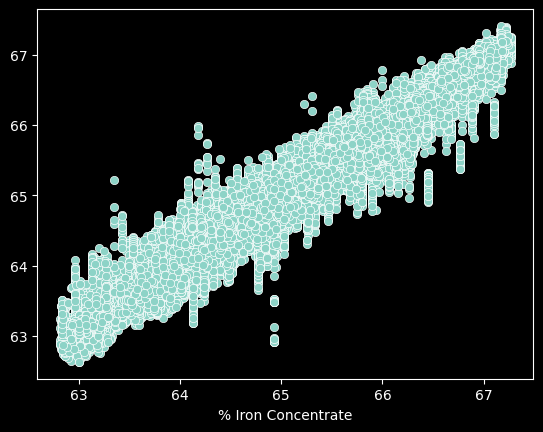

In [59]:
# Scatter Plot
sns.scatterplot(x=Y_test, y=Y_pred_5)

### Neural Net

In [60]:
# Creating the neural network model
NN = Sequential()
NN.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
NN.add(Dense(8, activation='relu'))
NN.add(Dense(1, activation='linear'))

# Compiling the model
NN.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
NN.fit(X_train, Y_train, epochs=20, batch_size=500, validation_split=0.2)

Epoch 1/20
380/380 [==============================] - 2s 3ms/step - loss: 2980.9651 - val_loss: 802.5354
Epoch 2/20
380/380 [==============================] - 1s 2ms/step - loss: 253.4003 - val_loss: 119.6176
Epoch 3/20
380/380 [==============================] - 1s 3ms/step - loss: 93.1223 - val_loss: 72.9190
Epoch 4/20
380/380 [==============================] - 1s 3ms/step - loss: 61.4525 - val_loss: 50.9611
Epoch 5/20
380/380 [==============================] - 1s 3ms/step - loss: 43.7534 - val_loss: 36.5885
Epoch 6/20
380/380 [==============================] - 1s 2ms/step - loss: 31.4335 - val_loss: 26.2278
Epoch 7/20
380/380 [==============================] - 1s 2ms/step - loss: 22.4882 - val_loss: 18.7969
Epoch 8/20
380/380 [==============================] - 1s 2ms/step - loss: 16.0730 - val_loss: 13.4404
Epoch 9/20
380/380 [==============================] - 1s 2ms/step - loss: 11.4213 - val_loss: 9.5402
Epoch 10/20
380/380 [==============================] - 1s 2ms/step - loss: 7.9

In [100]:
# Predicting on new data
Y_pred_6 = NN.predict(X_test)

125/125 [==============================] - 0s 1ms/step


In [62]:
# Calculate the R-squared score
r2_6 = r2_score(Y_test, Y_pred_6)
print("Accuracy of Neural Nets : ", r2_6*100)

Accuracy of Neural Nets :  44.8561287777299


### SVM

In [63]:
# Copying dataset for further use
df = df_mining
df = df.reset_index()

In [64]:
# select the first 10000 rows
df = df.iloc[:10000]

In [65]:
# Split the dataset into training and test sets
X = df.drop(['date','% Iron Concentrate'], axis=1)  # Features
Y = df["% Iron Concentrate"]  # Target variable
X_train, X_test, Y_train, Y_test_7 = train_test_split(X, Y, test_size=0.4, random_state=1)
# Printing the shape of the train and test data
print(X_train.shape,X_test.shape,Y_train.shape,Y_test_7.shape)

(6000, 16) (4000, 16) (6000,) (4000,)


In [66]:
# Using Standard Scalar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [67]:
# Create an SVR object and fit it to the training data
from sklearn.svm import SVR
SVR = SVR(kernel='linear', C=1.0, epsilon=0.1)
SVR.fit(X_train, Y_train)

SVR(kernel='linear')

In [68]:
# Use the trained model to make predictions on the test data
Y_pred_7 = SVR.predict(X_test)

In [69]:
# Compariosn of Predicted and Actual values with Residual Calculations
result_7 = pd.DataFrame({'Predicted': Y_pred_7, 'Actual': Y_test_7, 'Residual': Y_test_7 - Y_pred_7})
result_7

,Predicted,Actual,Residual
9953,66.387040,65.690,-0.697040
3850,65.379277,65.650,0.270723
4962,66.138819,66.210,0.071181
3886,66.368207,66.470,0.101793
5437,64.452238,64.565,0.112762
...,...,...,...
9274,65.791684,66.440,0.648316
8946,66.967458,66.240,-0.727458
7637,65.063323,64.290,-0.773323
6377,65.916962,65.870,-0.046962


In [70]:
# Calculate the R-squared score
r2 = r2_score(Y_test_7, Y_pred_7)
print("Accuracy of Support Vector Regression : ", r2*100)

Accuracy of Support Vector Regression :  84.76844139840172


<Axes: xlabel='% Iron Concentrate'>

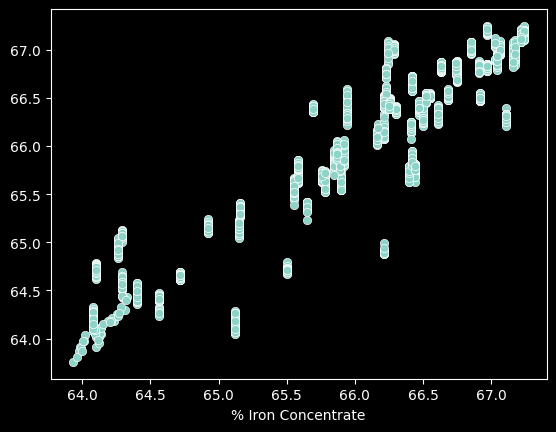

In [71]:
# Scatter Plot
sns.scatterplot(x=Y_test_7, y=Y_pred_7)

## Performance Evaluation

In [72]:
print("Summary for Linear Regression")
# Calculate Mean Error (ME)
ME_1 = np.mean(Y_pred_1 - Y_test)
# Calculate Mean Squared Error (MSE)
MSE_1 = mean_squared_error(Y_test, Y_pred_1)
# Calculate Root Mean Squared Error (RMSE)
RMSE_1 = np.sqrt(MSE_1)
# Calculate Mean Absolute Error (MAE)
MAE_1 = mean_absolute_error(Y_test, Y_pred_1)
# Calculate Mean Percentage Error (MPE)
MPE_1 = np.mean((Y_test - Y_pred_1) / Y_test) * 100
# Calculate Mean Absolute Percentage Error (MAPE)
MAPE_1 = np.mean(np.abs((Y_test - Y_pred_1) / Y_test)) * 100
# Calculate Coefficient of Determination (R^2)
R2_1 = r2_score(Y_test, Y_pred_1)
# Print the results
print("\nMean Error (ME): ", ME_1)
print("Mean Squared Error (MSE): ", MSE_1)
print("Root Mean Squared Error (RMSE): ", RMSE_1)
print("Mean Absolute Error (MAE): ", MAE_1)
print("Mean Percentage Error (MPE): ", MPE_1)
print("Mean Absolute Percentage Error (MAPE): ", MAPE_1)
print("Coefficient of Determination (R^2): ", R2_1)

Summary for Linear Regression

Mean Error (ME):  -0.005710941605395032
Mean Squared Error (MSE):  0.33548979300966114
Root Mean Squared Error (RMSE):  0.5792148073121587
Mean Absolute Error (MAE):  0.4529383008268043
Mean Percentage Error (MPE):  0.0008834472103137086
Mean Absolute Percentage Error (MAPE):  0.6942235053595651
Coefficient of Determination (R^2):  0.5879279633762097


In [73]:
print("Summary for K-Nearest Neighbors")
# Calculate Mean Error (ME)
ME_2 = np.mean(Y_pred_2 - Y_test)
# Calculate Mean Squared Error (MSE)
MSE_2 = mean_squared_error(Y_test, Y_pred_2)
# Calculate Root Mean Squared Error (RMSE)
RMSE_2 = np.sqrt(MSE_2)
# Calculate Mean Absolute Error (MAE)
MAE_2 = mean_absolute_error(Y_test, Y_pred_2)
# Calculate Mean Percentage Error (MPE)
MPE_2 = np.mean((Y_test - Y_pred_2) / Y_test) * 100
# Calculate Mean Absolute Percentage Error (MAPE)
MAPE_2 = np.mean(np.abs((Y_test - Y_pred_2) / Y_test)) * 100
# Calculate Coefficient of Determination (R^2)
R2_2 = r2_score(Y_test, Y_pred_2)
# Print the results
print("\nMean Error (ME): ", ME_2)
print("Mean Squared Error (MSE): ", MSE_2)
print("Root Mean Squared Error (RMSE): ", RMSE_2)
print("Mean Absolute Error (MAE): ", MAE_2)
print("Mean Percentage Error (MPE): ", MPE_2)
print("Mean Absolute Percentage Error (MAPE): ", MAPE_2)
print("Coefficient of Determination (R^2): ", R2_2)

Summary for K-Nearest Neighbors

Mean Error (ME):  -0.0009470775585777135
Mean Squared Error (MSE):  0.05732975630440508
Root Mean Squared Error (RMSE):  0.2394363303770025
Mean Absolute Error (MAE):  0.11925437167730207
Mean Percentage Error (MPE):  2.772346882253379e-05
Mean Absolute Percentage Error (MAPE):  0.1824717817335931
Coefficient of Determination (R^2):  0.9295835821782468


In [74]:
print("Summary for Regression Tree")
# Calculate Mean Error (ME)
ME_3 = np.mean(Y_pred_3 - Y_test)
# Calculate Mean Squared Error (MSE)
MSE_3 = mean_squared_error(Y_test, Y_pred_3)
# Calculate Root Mean Squared Error (RMSE)
RMSE_3 = np.sqrt(MSE_3)
# Calculate Mean Absolute Error (MAE)
MAE_3 = mean_absolute_error(Y_test, Y_pred_3)
# Calculate Mean Percentage Error (MPE)
MPE_3 = np.mean((Y_test - Y_pred_3) / Y_test) * 100
# Calculate Mean Absolute Percentage Error (MAPE)
MAPE_3 = np.mean(np.abs((Y_test - Y_pred_3) / Y_test)) * 100
# Calculate Coefficient of Determination (R^2)
R2_3 = r2_score(Y_test, Y_pred_3)
# Print the results
print("\nMean Error (ME): ", ME_3)
print("Mean Squared Error (MSE): ", MSE_3)
print("Root Mean Squared Error (RMSE): ", RMSE_3)
print("Mean Absolute Error (MAE): ", MAE_3)
print("Mean Percentage Error (MPE): ", MPE_3)
print("Mean Absolute Percentage Error (MAPE): ", MAPE_3)
print("Coefficient of Determination (R^2): ", R2_3)

Summary for Regression Tree

Mean Error (ME):  -0.006627017821139932
Mean Squared Error (MSE):  0.31303121035047177
Root Mean Squared Error (RMSE):  0.5594919216132364
Mean Absolute Error (MAE):  0.43767016375514756
Mean Percentage Error (MPE):  0.002844514192977968
Mean Absolute Percentage Error (MAPE):  0.6709685347277066
Coefficient of Determination (R^2):  0.6155131659334434


In [75]:
print("Summary for Random Forest")
# Calculate Mean Error (ME)
ME_4 = np.mean(Y_pred_4 - Y_test)
# Calculate Mean Squared Error (MSE)
MSE_4 = mean_squared_error(Y_test, Y_pred_4)
# Calculate Root Mean Squared Error (RMSE)
RMSE_4 = np.sqrt(MSE_4)
# Calculate Mean Absolute Error (MAE)
MAE_4 = mean_absolute_error(Y_test, Y_pred_4)
# Calculate Mean Percentage Error (MPE)
MPE_4 = np.mean((Y_test - Y_pred_4) / Y_test) * 100
# Calculate Mean Absolute Percentage Error (MAPE)
MAPE_4 = np.mean(np.abs((Y_test - Y_pred_4) / Y_test)) * 100
# Calculate Coefficient of Determination (R^2)
R2_4 = r2_score(Y_test, Y_pred_4)
# Print the results
print("\nMean Error (ME): ", ME_4)
print("Mean Squared Error (MSE): ", MSE_4)
print("Root Mean Squared Error (RMSE): ", RMSE_4)
print("Mean Absolute Error (MAE): ", MAE_4)
print("Mean Percentage Error (MPE): ", MPE_4)
print("Mean Absolute Percentage Error (MAPE): ", MAPE_4)
print("Coefficient of Determination (R^2): ", R2_4)

Summary for Random Forest

Mean Error (ME):  -0.014153741288579656
Mean Squared Error (MSE):  0.01975050798609016
Root Mean Squared Error (RMSE):  0.1405365005473317
Mean Absolute Error (MAE):  0.03752440923769986
Mean Percentage Error (MPE):  0.02142767998765445
Mean Absolute Percentage Error (MAPE):  0.057533914354674864
Coefficient of Determination (R^2):  0.975741044229181


In [76]:
print("Summary for Boosted Trees")
# Calculate Mean Error (ME)
ME_5 = np.mean(Y_pred_5 - Y_test)
# Calculate Mean Squared Error (MSE)
MSE_5 = mean_squared_error(Y_test, Y_pred_5)
# Calculate Root Mean Squared Error (RMSE)
RMSE_5 = np.sqrt(MSE_5)
# Calculate Mean Absolute Error (MAE)
MAE_5 = mean_absolute_error(Y_test, Y_pred_5)
# Calculate Mean Percentage Error (MPE)
MPE_5 = np.mean((Y_test - Y_pred_5) / Y_test) * 100
# Calculate Mean Absolute Percentage Error (MAPE)
MAPE_5 = np.mean(np.abs((Y_test - Y_pred_5) / Y_test)) * 100
# Calculate Coefficient of Determination (R^2)
R2_5 = r2_score(Y_test, Y_pred_5)
# Print the results
print("\nMean Error (ME): ", ME_5)
print("Mean Squared Error (MSE): ", MSE_5)
print("Root Mean Squared Error (RMSE): ", RMSE_5)
print("Mean Absolute Error (MAE): ", MAE_5)
print("Mean Percentage Error (MPE): ", MPE_5)
print("Mean Absolute Percentage Error (MAPE): ", MAPE_5)
print("Coefficient of Determination (R^2): ", R2_5)


Summary for Boosted Trees

Mean Error (ME):  -0.019630995896433388
Mean Squared Error (MSE):  0.03375524492810936
Root Mean Squared Error (RMSE):  0.18372600504041162
Mean Absolute Error (MAE):  0.12395065933621191
Mean Percentage Error (MPE):  0.029083185160757107
Mean Absolute Percentage Error (MAPE):  0.18995511015306998
Coefficient of Determination (R^2):  0.958539446462801


In [77]:
print("Summary for SVM")
# Calculate Mean Error (ME)
ME_7 = np.mean(Y_pred_7 - Y_test_7)
# Calculate Mean Squared Error (MSE)
MSE_7 = mean_squared_error(Y_test_7, Y_pred_7)
# Calculate Root Mean Squared Error (RMSE)
RMSE_7 = np.sqrt(MSE_7)
# Calculate Mean Absolute Error (MAE)
MAE_7 = mean_absolute_error(Y_test_7, Y_pred_7)
# Calculate Mean Percentage Error (MPE)
MPE_7 = np.mean((Y_test_7 - Y_pred_7) / Y_test_7) * 100
# Calculate Mean Absolute Percentage Error (MAPE)
MAPE_7 = np.mean(np.abs((Y_test_7 - Y_pred_7) / Y_test)) * 100
# Calculate Coefficient of Determination (R^2)
R2_7 = r2_score(Y_test_7, Y_pred_7)
# Print the results
print("\nMean Error (ME): ", ME_7)
print("Mean Squared Error (MSE): ", MSE_7)
print("Root Mean Squared Error (RMSE): ", RMSE_7)
print("Mean Absolute Error (MAE): ", MAE_7)
print("Mean Percentage Error (MPE): ", MPE_7)
print("Mean Absolute Percentage Error (MAPE): ", MAPE_7)
print("Coefficient of Determination (R^2): ", R2_7)

Summary for SVM

Mean Error (ME):  -0.010189176439838694
Mean Squared Error (MSE):  0.11692195304339234
Root Mean Squared Error (RMSE):  0.34193852231562377
Mean Absolute Error (MAE):  0.23474885430694575
Mean Percentage Error (MPE):  0.013294272411375535
Mean Absolute Percentage Error (MAPE):  0.3526102030891124
Coefficient of Determination (R^2):  0.8476844139840172


### Performance Visualization

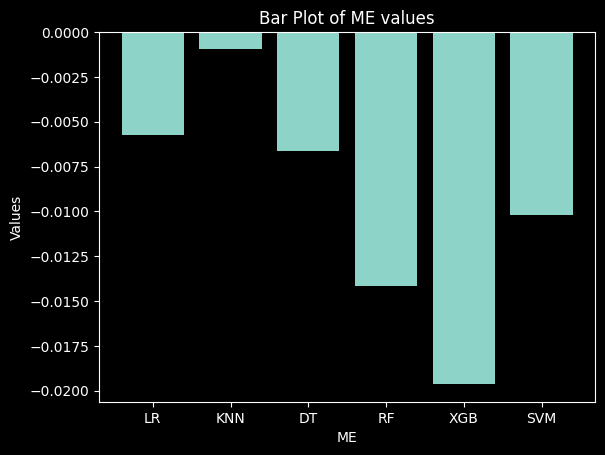

In [78]:
# List of me values
X_values = ['LR','KNN','DT','RF','XGB','SVM']
Y_values = [ME_1,ME_2,ME_3,ME_4,ME_5,ME_7]
# Generate Bar Plot
plt.bar(X_values, Y_values)
# Set plot title and axis labels
plt.title("Bar Plot of ME values")
plt.xlabel("ME")
plt.ylabel('Values')
# Show plot
plt.show()

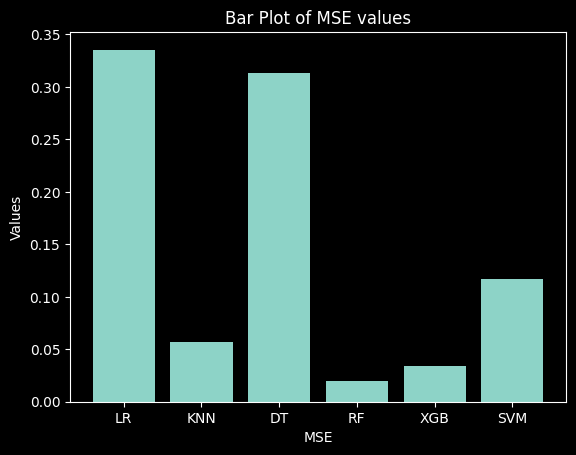

In [79]:
# List of me values
X_values = ['LR','KNN','DT','RF','XGB','SVM']
Y_values = [MSE_1,MSE_2,MSE_3,MSE_4,MSE_5,MSE_7]
# Generate Bar Plot
plt.bar(X_values, Y_values)
# Set plot title and axis labels
plt.title("Bar Plot of MSE values")
plt.xlabel("MSE")
plt.ylabel('Values')
# Show plot
plt.show()

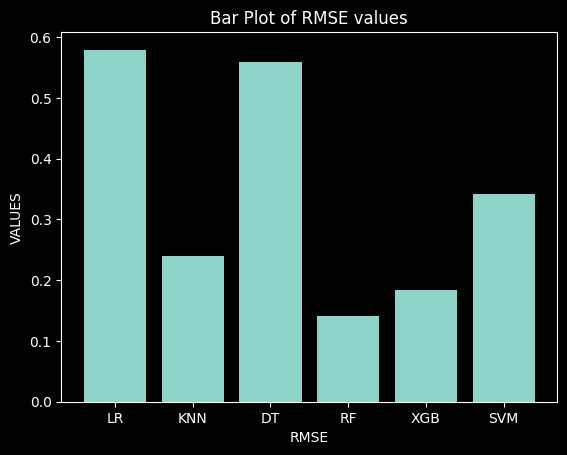

In [80]:
# List of me values
X_values = ['LR','KNN','DT','RF','XGB','SVM']
Y_values = [RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,RMSE_7]
# Generate Bar Plot
plt.bar(X_values, Y_values)
# Set plot title and axis labels
plt.title("Bar Plot of RMSE values")
plt.xlabel("RMSE")
plt.ylabel("VALUES")
# Show plot
plt.show()

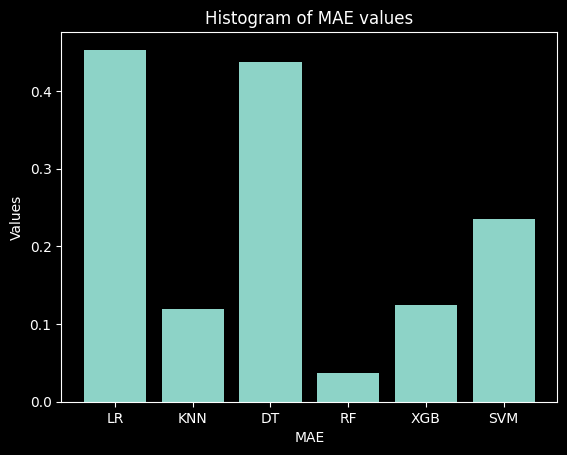

In [81]:
# List of me values
X_values = ['LR','KNN','DT','RF','XGB','SVM']
Y_values = [MAE_1,MAE_2,MAE_3,MAE_4,MAE_5,MAE_7]
# Generate Bar Plot
plt.bar(X_values, Y_values)
# Set plot title and axis labels
plt.title("Histogram of MAE values")
plt.xlabel("MAE")
plt.ylabel('Values')
# Show plot
plt.show()

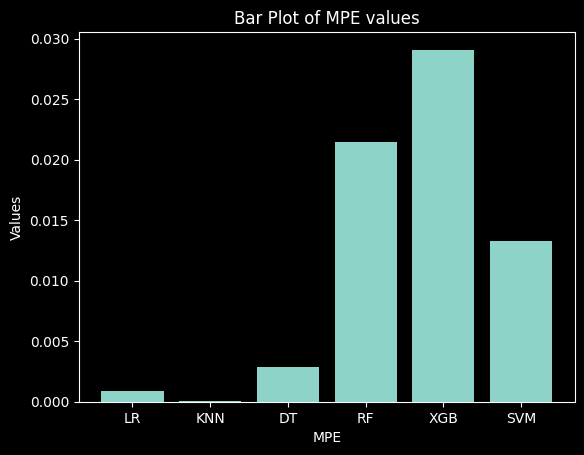

In [82]:
# List of me values
X_values = ['LR','KNN','DT','RF','XGB','SVM']
Y_values = [MPE_1,MPE_2,MPE_3,MPE_4,MPE_5,MPE_7]
# Generate Bar Plot
plt.bar(X_values, Y_values)
# Set plot title and axis labels
plt.title("Bar Plot of MPE values")
plt.xlabel("MPE")
plt.ylabel('Values')
# Show plot
plt.show()

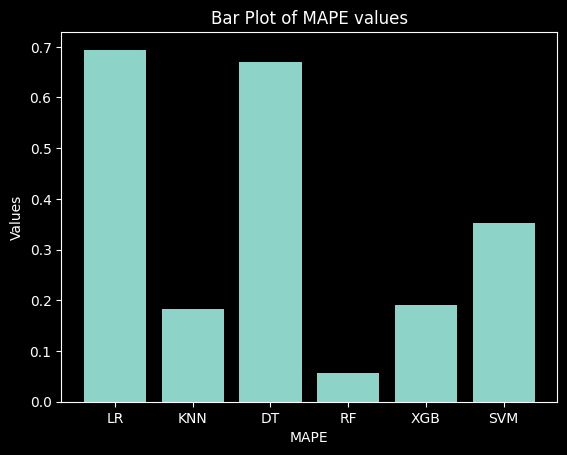

In [83]:
# List of me values
X_values = ['LR','KNN','DT','RF','XGB','SVM']
Y_values = [MAPE_1,MAPE_2,MAPE_3,MAPE_4,MAPE_5,MAPE_7]
# Generate Bar Plot
plt.bar(X_values, Y_values)
# Set plot title and axis labels
plt.title("Bar Plot of MAPE values")
plt.xlabel("MAPE")
plt.ylabel('Values')
# Show plot
plt.show()

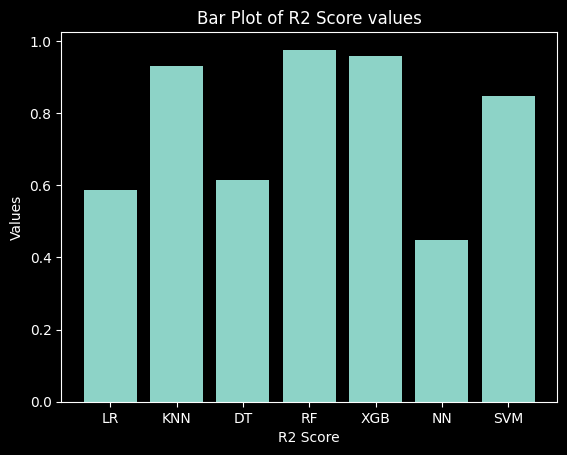

In [84]:
# List of me values
X_values = ['LR','KNN','DT','RF','XGB','NN','SVM']
Y_values = [R2_1,R2_2,R2_3,R2_4,R2_5,r2_6,R2_7]
# Generate Bar Plot
plt.bar(X_values, Y_values)
# Set plot title and axis labels
plt.title("Bar Plot of R2 Score values")
plt.xlabel("R2 Score")
plt.ylabel('Values')
# Show plot
plt.show()

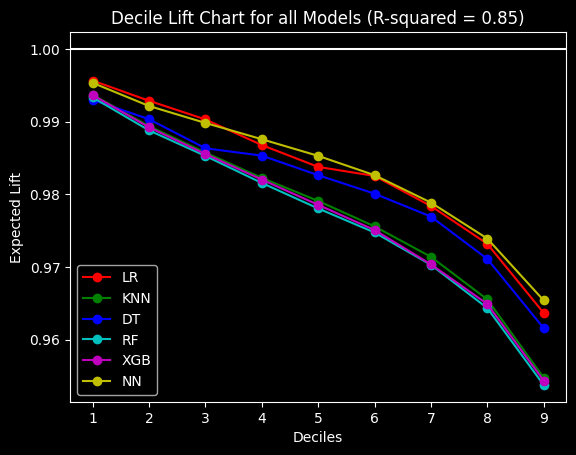

In [85]:
# Create a list of Y_pred arrays
Y_preds = [Y_pred_1, Y_pred_2, Y_pred_3, Y_pred_4, Y_pred_5, Y_pred_6]

# Create a list of colors for each line
colors = ['r', 'g', 'b', 'c', 'm', 'y']
labels = ['LR','KNN','DT','RF','XGB','NN']
# Plot the decile lift charts for each Y_pred array
for i in range(len(Y_preds)):
    # Combine Y_test and Y_pred into a 2D array
    data = np.column_stack((Y_test, Y_preds[i]))

    # Sort the data by Y_pred (ascending)
    data_sorted = data[data[:, 1].argsort()[::-1]]

    # Split the sorted data into 10 equal sized groups (deciles)
    deciles = np.array_split(data_sorted, 10)

    # Calculate the average value of Y_test for each decile
    avg_y = []
    for d in deciles:
        avg_y.append(np.mean(d[:, 0]))

    # Calculate the expected lift for each decile
    exp_lift = []
    for j in range(1, len(avg_y)):
        exp_lift.append(avg_y[j] / avg_y[0])

    # Plot the decile lift chart
    plt.plot(np.arange(1, len(exp_lift)+1), exp_lift, marker='o', color=colors[i], label=labels[i])

# Add a horizontal line at y=1.0
plt.axhline(y=1.0, color='w', linestyle='-')
plt.legend()
plt.xlabel('Deciles')
plt.ylabel('Expected Lift')
plt.title('Decile Lift Chart for all Models (R-squared = {:.2f})'.format(r2))
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html /content/IE7275_GROUP_20_FINAL_PROJECT.ipynb